<a href="https://colab.research.google.com/github/Ekaterina-31/Kursovaya-Chemical-Compounds/blob/main/2_ML_%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_IC50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Регрессия IC50

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Загрузка датасета

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/8 Классическое МО (ML)/Курсовая работа Хим соединения/df.xlsx')
df

,"IC50, mM","CC50, mM",SI,"IC50, mM_log","CC50, mM_log",SI_log,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,...,fr_thiophene,fr_unbrch_alkane,fr_urea,Chi,Kappa,PEOE_VSA,SMR_VSA,SlogP_VSA,EState_VSA,VSA_EState
0,6.239374,175.482382,28.125000,1.979535,5.173221,3.371597,0.203662,0.203662,0.281677,0.881996,...,0,0.15,0,6.244950,0.872278,1.849596,1.656534,1.409310,1.363038,3.212521
1,0.771831,5.402819,7.000000,0.572014,1.856738,2.079442,0.120448,0.120448,0.388360,0.899521,...,0,0.15,0,6.601003,0.914682,1.350636,1.564823,1.654294,1.111547,3.036357
2,223.808778,161.142320,0.720000,5.415250,5.088474,0.542324,0.022420,0.022420,0.395171,0.900640,...,0,0.15,0,8.046121,1.065814,2.125484,1.729382,1.507932,1.261023,3.605910
3,1.705624,107.855654,63.235294,0.995333,4.690023,4.162553,0.203902,0.203902,0.284134,0.882400,...,0,0.20,0,6.474522,0.955535,1.899410,1.693357,1.444191,1.386790,3.236238
4,107.131532,139.270991,1.300000,4.683348,4.943576,0.832909,0.207807,0.207807,0.196742,0.868043,...,0,0.00,0,7.283966,1.008745,2.041540,2.036026,2.085103,1.578446,3.844661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,31.000104,34.999650,1.129017,3.465739,3.583509,0.755660,0.779703,0.779703,0.034912,0.778814,...,0,0.00,0,6.341904,0.771707,1.858068,1.899974,2.107205,1.926522,3.177215
997,31.999934,33.999415,1.062484,3.496506,3.555331,0.723911,0.831164,0.831164,0.022036,0.752137,...,0,0.00,0,7.167030,1.037718,2.343830,2.191027,2.471311,2.163199,3.334032
998,30.999883,33.999458,1.096761,3.465732,3.555333,0.740394,0.857343,0.857343,0.019276,0.757941,...,0,0.00,0,7.909882,1.261307,2.678913,2.474751,2.781308,2.369348,3.486369
999,31.998959,32.999644,1.031272,3.496476,3.526350,0.708662,0.845478,0.845478,0.106566,0.667368,...,0,0.00,0,7.060575,1.358744,2.691922,2.348154,2.608160,2.111231,3.344150


## Подготовка данных для обучения модели

In [ ]:
# исключаем прочие целевые переменные
df = df.drop(columns=['IC50, mM', 'CC50, mM', 'SI', 'CC50, mM_log', 'SI_log'])

In [ ]:
# выделяем вектор признаков и вектор целевой переменной
X = df.drop(columns=['IC50, mM_log'])
y = df['IC50, mM_log']

## Выбор лучшей модели без гиперпараметров

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.1 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
from catboost import CatBoostRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Список моделей
models = {
    "LinearRegression": LinearRegression(),
    # "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "KNN": KNeighborsRegressor(),
    # "SVR": SVR(),
    "xgb": xgb.XGBRegressor(),
    "CatBoost": CatBoostRegressor()
}

In [ ]:
%%time
from sklearn.model_selection import cross_validate
import numpy as np

results = {}

# Тестируем все модели
for name, model in models.items():
    # расчет с несколькими метриками
    scoring = ['neg_mean_squared_error', 'r2']
    scores = cross_validate(model, X, y, cv=5, scoring=scoring)

    # Сохраняем результаты
    results[name] = {
        'MSE': -np.mean(scores['test_neg_mean_squared_error']),  # инвертируем знак MSE
        'R²': np.mean(scores['test_r2'])
    }

results_df = pd.DataFrame.from_dict(results, orient='index')

Выходные данные были обрезаны до нескольких последних строк (5000).
6:	learn: 1.7373209	total: 120ms	remaining: 17.1s
7:	learn: 1.7200743	total: 131ms	remaining: 16.2s
8:	learn: 1.7032155	total: 141ms	remaining: 15.5s
9:	learn: 1.6862479	total: 151ms	remaining: 15s
10:	learn: 1.6697205	total: 161ms	remaining: 14.5s
11:	learn: 1.6564508	total: 171ms	remaining: 14.1s
12:	learn: 1.6412478	total: 182ms	remaining: 13.8s
13:	learn: 1.6261984	total: 192ms	remaining: 13.5s
14:	learn: 1.6111862	total: 204ms	remaining: 13.4s
15:	learn: 1.5978766	total: 214ms	remaining: 13.2s
16:	learn: 1.5827873	total: 224ms	remaining: 13s
17:	learn: 1.5699753	total: 234ms	remaining: 12.8s
18:	learn: 1.5581954	total: 245ms	remaining: 12.6s
19:	learn: 1.5481410	total: 255ms	remaining: 12.5s
20:	learn: 1.5361590	total: 265ms	remaining: 12.4s
21:	learn: 1.5264037	total: 275ms	remaining: 12.2s
22:	learn: 1.5200593	total: 285ms	remaining: 12.1s
23:	learn: 1.5107083	total: 304ms	remaining: 12.4s
24:	learn: 1.5012785	t

In [ ]:
results_df

,MSE,R²
LinearRegression,5.758295,-0.811225
RandomForest,2.979500,0.059215
KNN,3.887026,-0.225203
xgb,3.181301,-0.011345
CatBoost,2.893588,0.084480


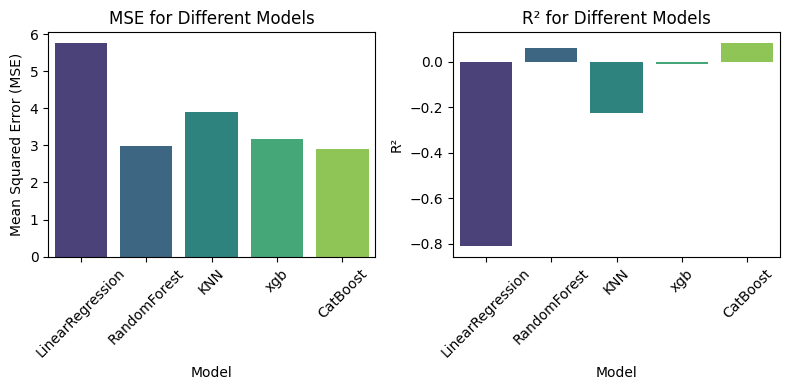

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

# Диаграмма для MSE
sns.barplot(x=results_df.index, y=results_df['MSE'], palette='viridis', ax=ax[0])
ax[0].set_title('MSE for Different Models')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Mean Squared Error (MSE)')
ax[0].tick_params(axis='x', rotation=45)  # поворот меток на оси x

# Диаграмма для R²
sns.barplot(x=results_df.index, y=results_df['R²'], palette='viridis', ax=ax[1])
ax[1].set_title('R² for Different Models')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('R²')
ax[1].tick_params(axis='x', rotation=45)  # поворот меток на оси x

# Подгоняем элементы графика
plt.tight_layout()
plt.show()

## Выбор лучшей модели с гиперпараметрами

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train dataset size: {X_train.shape}, {y_train.shape}")
print(f"Test dataset size: {X_test.shape}, {y_test.shape}")

Train dataset size: (800, 129), (800,)
Test dataset size: (201, 129), (201,)


In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.5 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
from catboost import CatBoostRegressor
from skopt import BayesSearchCV

# Список моделей и их гиперпараметров
models = {
    "LinearRegression": (LinearRegression(), {
        'copy_X': [True, False],
        'fit_intercept': [True, False],
        'n_jobs': [-1, 1, 5, 10],
        'positive': [True, False],
    }),
    # "DecisionTree": (DecisionTreeRegressor(), {
        # 'max_depth': (1, 20),
        # 'min_samples_split': (2, 10),
    # }),
    "RandomForest": (RandomForestRegressor(), {
        'n_estimators': (50, 250),
        'max_depth': (1, 20),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 5),
    }),
    "KNN": (KNeighborsRegressor(), {
        'n_neighbors': (1, 20),
        'weights': ['uniform', 'distance'],
    }),
    # "SVR": (SVR(), {
        # 'model__C': (0.1, 100.0, 'log-uniform'),
        # 'model__epsilon': (0.01, 1.0, 'log-uniform'),
        # 'model__kernel': ['linear', 'rbf', 'poly']
    # })
    "xgb": (xgb.XGBRegressor(), {
        'n_neighbors': (1, 20),
        'max_depth': (1, 20),
    }),
    "CatBoost": (CatBoostRegressor(), {
        'n_estimators': (50, 100),
        'depth': (1, 15),
    }),
}

In [ ]:
%%time
# Перебор моделей
best_model = None
best_score = -float("inf")
best_params = {}

results = []

def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return {'MSE': mse, 'MAE': mae}

for name, (model, params) in models.items():

    # Байесовская оптимизация гиперпараметров
    bayes_search = BayesSearchCV(
        estimator=model,
        search_spaces=params,
        n_iter=15,
        cv=5,
        scoring='r2',
        n_jobs=-1,
        random_state=42
    )

    # Обучение модели
    bayes_search.fit(X_train, y_train)

    y_pred = bayes_search.predict(X_test)

    scores = evaluate_model(y_test, y_pred)

    # Проверка, стала ли эта модель лучшей
    if bayes_search.best_score_ > best_score:
        best_score = bayes_search.best_score_
        best_model = name
        best_params = bayes_search.best_params_

    results.append({
    'Модель': name,
    'R²': bayes_search.best_score_,
    'MSE': scores['MSE'],
    'MAE': scores['MAE'],
    'Гиперпараметры': bayes_search.best_params_,
    })

Learning rate set to 0.256961
0:	learn: 1.7413753	total: 8.7ms	remaining: 861ms
1:	learn: 1.6705881	total: 13ms	remaining: 635ms
2:	learn: 1.5962013	total: 17.1ms	remaining: 551ms
3:	learn: 1.5499146	total: 21.2ms	remaining: 508ms
4:	learn: 1.5151566	total: 25.4ms	remaining: 483ms
5:	learn: 1.4766671	total: 29.5ms	remaining: 462ms
6:	learn: 1.4425420	total: 33.6ms	remaining: 446ms
7:	learn: 1.4171059	total: 37.9ms	remaining: 436ms
8:	learn: 1.4001904	total: 42.1ms	remaining: 426ms
9:	learn: 1.3839823	total: 46.2ms	remaining: 416ms
10:	learn: 1.3751143	total: 50.6ms	remaining: 409ms
11:	learn: 1.3660465	total: 54.5ms	remaining: 400ms
12:	learn: 1.3513819	total: 59.9ms	remaining: 401ms
13:	learn: 1.3362057	total: 64.1ms	remaining: 394ms
14:	learn: 1.3267752	total: 68.2ms	remaining: 386ms
15:	learn: 1.3221748	total: 72.3ms	remaining: 380ms
16:	learn: 1.3157507	total: 76.3ms	remaining: 372ms
17:	learn: 1.3082730	total: 80.3ms	remaining: 366ms
18:	learn: 1.3054787	total: 84.2ms	remaining: 3

In [ ]:
pd.DataFrame(results)

,Модель,R²,MSE,MAE,Гиперпараметры
0,LinearRegression,0.142617,3.245821,1.409602,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,RandomForest,0.411399,1.973588,1.112606,"{'max_depth': 11, 'min_samples_leaf': 5, 'min_..."
2,KNN,0.348583,2.326681,1.222919,"{'n_neighbors': 6, 'weights': 'uniform'}"
3,xgb,0.374557,2.246080,1.173841,"{'max_depth': 2, 'n_neighbors': 20}"
4,CatBoost,0.393618,2.378317,1.212303,"{'depth': 4, 'n_estimators': 100}"


In [ ]:
# Вывод лучшей модели
print("Лучшая модель:", best_model)
print("Лучшие параметры:", best_params)
print("Лучший R²:", best_score)

Лучшая модель: RandomForest
Лучшие параметры: OrderedDict([('max_depth', 11), ('min_samples_leaf', 5), ('min_samples_split', 6), ('n_estimators', 218)])
Лучший R²: 0.4113990359612073


## Подбор гиперпараметров для выбранной модели

In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Определяем модель
rf_model = RandomForestRegressor(random_state=42)

# Определяем параметры для поиска
param_grid = {
    'n_estimators': [100, 200, 250],  # Количество деревьев
    'max_depth': [10, 20, 30],  # Максимальная глубина деревьев
    'min_samples_split': [5, 10, 15],  # Минимальное количество сэмплов для разбиения узла
    'min_samples_leaf': [1, 2, 4, 6],  # Минимальное количество сэмплов в листе
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

# Обучение на всех данных
grid_search.fit(X_train, y_train)

# Оценка модели с лучшими гиперпараметрами
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
CPU times: user 13.5 s, sys: 2.34 s, total: 15.9 s
Wall time: 26min 1s


In [ ]:
# Вывод лучших параметров
print("Best parameters found: ", grid_search.best_params_)

print(f"Best score (R²): {best_score:.4f}")

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score (R²): 0.4086


## Предсказание на всех данных

In [ ]:
# сделаем предсказания на тесте
y_pred = best_model.predict(X)

# y - это правильные ответы для X
print(f'R²: {r2_score(y, y_pred)}')

R²: 0.6999360676040551
